<a href="https://colab.research.google.com/github/DorofeeVDaniil1/3DLabIRNITU/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ВАРИАНТ РАБОТЫ имеет вид Z-f1-f2, где
      Z=1-6 – вид закона распределения генерируемых признаков

  1.     Биномиальное

  2.     Геометрическое

  3.     Гипергеометрическое

  4.     Пуассона

  5.     Равномерное

  6.     Нормальное

f1 -вид функциональной зависимости от одного аргумента

f1=1-12

 1-квадратичная функция

 2- синусоидальная функция

 3-логарифмическая функция

 4-экспоненциальная функция

 5-корень квадратный

 6-тангенс

 7- кубическая функция

f2 - вид функциональной зависимости от двух аргументов

шестигорбовая обратная верблюжья функция на промежутке:  x -3 3    y -2 2
мой вариант z=5, f1=3, f2=10;

In [14]:
import numpy as np
from numpy.random import geometric
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from random import seed
from random import random
from math import exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math


In [15]:
# Измененная функция инициализации сети
def initialize_network(n_inputs, n_hidden, n_outputs):
  network = list()
  hidden_layer = [{'weights':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
  network.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hidden +1)]} for i in range(n_outputs)]
  network.append(output_layer)
  return network

# Расчет активации нейрона для входного значения
def activate(weights, inputs):
  activation = weights[-1]
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]
  return activation

# Функция активации нейрона
def transfer(activation):
    return 1 / (1 + np.exp(-activation))

# Проход вперед: входные данные передаются через сеть для получения выхода
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Расчет производной вывода нейрона
def transfer_derivative(output):
    return output * (1 - output)

# Обратное распространение ошибки и сохранение в нейронах
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Обновление весов сети в соответствии с ошибкой
def update_weights(network, row, l_rate):
  for i in range(len(network)):
    inputs = row[:-1]
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']

# Обучение сети на тренировочных данных
def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
        outputs = forward_propagate(network, row)
        expected = [0 for i in range(n_outputs)]
        expected[0] = row[-1]
        sum_error += sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])
        backward_propagate_error(network, expected)
        update_weights(network, row, l_rate)
    print('> epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

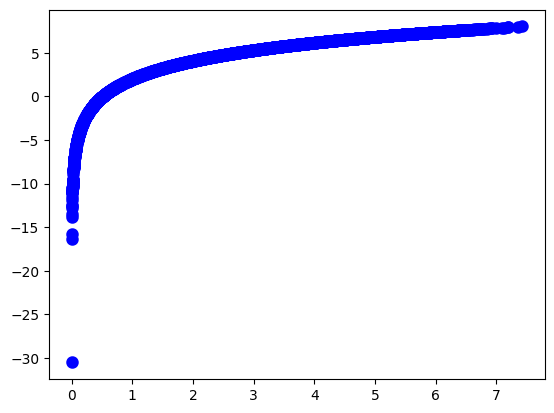

In [16]:
x=[]
i = 0
# Функция для вычисления логарифма от x
def function_12(x,a,b):
    return a + b * np.log(x)
# Генерация случайных данных для заданного количества точек
def generation_point(count):
    xa = []
    i = 0
    while i < count:
        # Генерация случайных чисел с использованием нормального и равномерного распределений
        rand = np.random.normal(10, 1, 1) * np.random.uniform(0, 0.6, 1)
        xa.extend(rand)
        i = i + 1
    # Вычисление значения функции для сгенерированных данных
    z1 = function_12(xa,2,3)
    x1 = np.reshape(xa, (len(xa), 1))
    z1 = np.reshape(z1, (len(z1), 1))
    return x1, z1
# Генерация данных и разделение их на обучающий и тестовый наборы
qq, ee = generation_point(5000)
X_train, X_test, y_train, y_test = train_test_split(qq, ee, test_size=0.4, random_state=123)
# Визуализация сгенерированных данных
plt.scatter(qq, ee, marker='o', linewidths=3, c='BLUE')
plt.show()

In [17]:
# Объединение обучающих данных в один датасет
dataset1 = np.concatenate((X_train, y_train), axis=1)
dataset1 = dataset1.tolist()
# Определение количества входных и выходных параметров в датасете
n_inputs = len(dataset1[0]) - 1
n_outputs = 1
# Установка параметров обучения
l_rate = 1.0
n_epoch = 50
# Инициализация нейронной сети
network = initialize_network(n_inputs, 20, n_outputs)
# Обучение нейронной сети на обучающем датасете
train_network(network, dataset1, l_rate, n_epoch, n_outputs)


> epoch=0, lrate=1.000, error=63680.916
> epoch=1, lrate=1.000, error=62086.907
> epoch=2, lrate=1.000, error=61540.642
> epoch=3, lrate=1.000, error=61539.536
> epoch=4, lrate=1.000, error=61539.098
> epoch=5, lrate=1.000, error=61538.874
> epoch=6, lrate=1.000, error=61538.744
> epoch=7, lrate=1.000, error=61538.663
> epoch=8, lrate=1.000, error=61538.610
> epoch=9, lrate=1.000, error=61538.575
> epoch=10, lrate=1.000, error=61538.550
> epoch=11, lrate=1.000, error=61538.532
> epoch=12, lrate=1.000, error=61538.520
> epoch=13, lrate=1.000, error=61538.511
> epoch=14, lrate=1.000, error=61538.505
> epoch=15, lrate=1.000, error=61538.500
> epoch=16, lrate=1.000, error=61538.497
> epoch=17, lrate=1.000, error=61538.494
> epoch=18, lrate=1.000, error=61538.493
> epoch=19, lrate=1.000, error=61538.492
> epoch=20, lrate=1.000, error=61538.491
> epoch=21, lrate=1.000, error=61538.490
> epoch=22, lrate=1.000, error=61538.490
> epoch=23, lrate=1.000, error=61538.490
> epoch=24, lrate=1.000, e

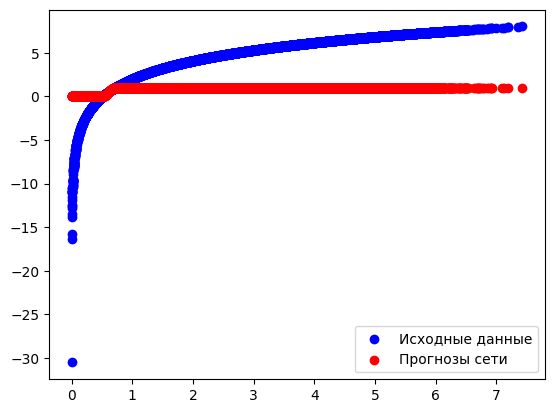

In [18]:
# Функция для получения прогноза от нейронной сети для заданной строки данных
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs
# Инициализация переменной для индексации
i = -1
# Прогнозирование для каждой строки в обучающем наборе
for row in X_train:
    i = i + 1
    # Получение прогноза от нейронной сети для текущей строки
    prediction = predict(network, row)
    # Сохранение прогнозов в массиве
    if i == 0:
        predictTrain = np.array(prediction)
    else:
        predictTrain = np.append(predictTrain, prediction, axis=0)

# Визуализация сгенерированных данных и прогнозов
plt.scatter(qq, ee, marker='o', linewidths=1, c='BLUE', label='Исходные данные')
plt.scatter(X_train, predictTrain, marker='o', linewidths=1, c='RED', label='Прогнозы сети')
# Добавление легенды
plt.legend()
# Отображение графика
plt.show()


In [19]:
def approximation_quality(deviations, predictions, data):
    """
    Функция для вычисления кол-ва верно предсказанных точек в данных.

    Параметры:
    - deviations: стандартное отклонение данных
    - predictions: массив предсказанных значений
    - data: исходные данные
    Возвращает кол-во верно предсказанных точек.
    """
    # Вычисление отношения верных предсказаний к общему числу точек
    correct_predictions = np.sum(np.abs(predictions - data) <= deviations)
    total_points = len(data)

    # Процент верно предсказанных точек
    accuracy_percentage = (correct_predictions / total_points) * 100
    return accuracy_percentage

# Вычисление стандартного отклонения для использования в функции approximation_quality
deviations = np.std(X_train, ddof=1)

# Вывод процента верно предсказанных точек в тестовых данных
print('верно полученных точек в тестовых данных')
print(approximation_quality(deviations, predictTrain, X_train))

верно полученных точек в тестовых данных
132228.73333333334


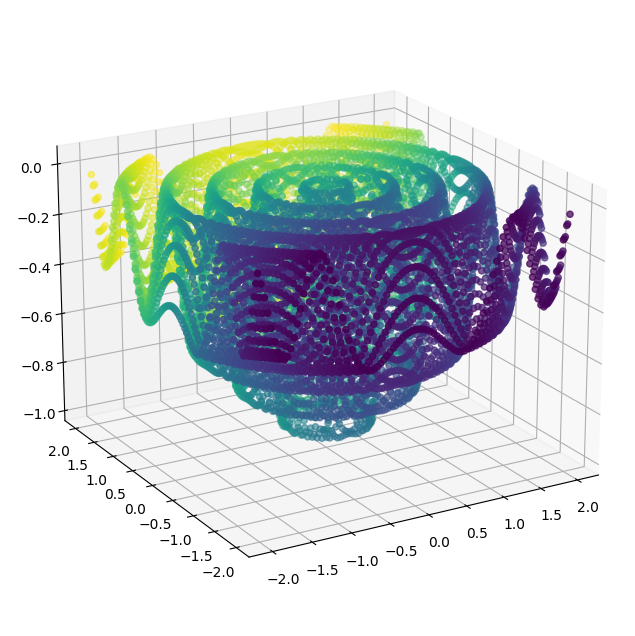

In [20]:
# Волновая функция
def wave_fun(x, y):
    return -(1 + np.cos(12 * np.sqrt(x**2 + y**2)))/(0.5*(x**2+y**2)+ 2)


# Генерация данных и меш-грида для визуализации
x1val = np.linspace(-2, 2, 100)
x2val = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1val, x2val)
z = wave_fun(x1, x2)


# Визуализация функции Бирда
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(10000)
ax.scatter(x1, x2, z, marker='o', linewidths=1, c=col)

# Поворот графика против часовой стрелки
ax.view_init(elev=20, azim=-120)

# # # Подготовка данных для обучения и тестирования
# x1 = x1.flatten()
# x2 = x2.flatten()
# z = z.flatten()

scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1.reshape(-1, 1))
x2 = scaler.fit_transform(x2.reshape(-1, 1))
z = scaler.fit_transform(z.reshape(-1, 1))

dataset = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(dataset, z, test_size=0.4, random_state=123)

plt.show()

In [21]:
# Соединение обучающих данных и целевых значений в один массив
dataset1 = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
# datsset1 = np.column_stack((X_train, y_train))
# Определение количества входных и выходных нейронов
n_inputs = len(dataset1[0]) - 1
n_outputs = 1
# Настройка параметров обучения
l_rate = 1.5  # Скорость обучения (может потребоваться настройка)
n_epoch = 30  # Количество эпох обучения (может потребоваться настройка)
# Инициализация нейронной сети
network = initialize_network(n_inputs, 10, n_outputs)
# Обучение нейронной сети
train_network(network, dataset1, l_rate, n_epoch, n_outputs)


> epoch=0, lrate=1.500, error=412.027
> epoch=1, lrate=1.500, error=389.715
> epoch=2, lrate=1.500, error=387.992
> epoch=3, lrate=1.500, error=387.332
> epoch=4, lrate=1.500, error=386.923
> epoch=5, lrate=1.500, error=386.586
> epoch=6, lrate=1.500, error=386.248
> epoch=7, lrate=1.500, error=385.862
> epoch=8, lrate=1.500, error=385.386
> epoch=9, lrate=1.500, error=384.786
> epoch=10, lrate=1.500, error=384.032
> epoch=11, lrate=1.500, error=383.110
> epoch=12, lrate=1.500, error=381.997
> epoch=13, lrate=1.500, error=380.625
> epoch=14, lrate=1.500, error=378.868
> epoch=15, lrate=1.500, error=376.455
> epoch=16, lrate=1.500, error=372.247
> epoch=17, lrate=1.500, error=368.046
> epoch=18, lrate=1.500, error=366.243
> epoch=19, lrate=1.500, error=365.405
> epoch=20, lrate=1.500, error=364.870
> epoch=21, lrate=1.500, error=364.428
> epoch=22, lrate=1.500, error=364.027
> epoch=23, lrate=1.500, error=363.665
> epoch=24, lrate=1.500, error=363.346
> epoch=25, lrate=1.500, error=363.

In [22]:
# Инициализация переменной для индексации
i = -1
# Прогнозирование для каждой строки в dataset1
for row in dataset1:
    i = i + 1
    prediction = predict(network, row)
    # Сохранение прогнозов в массив predictTrain
    if i == 0:
        predictTrain = np.array(prediction)
    else:
        predictTrain = np.append(predictTrain, prediction, axis=0)

# Вывод прогнозов
print(predictTrain)

[0.68801464 0.82133371 0.76275604 ... 0.64640147 0.66832657 0.61605738]


In [23]:
# Прогнозирование для каждой точки
predicted_values = np.array([forward_propagate(network, np.array([x1, x2]))[0] for x1, x2 in zip(X_train[:, 0], X_train[:, 1])])
# Создание трехмерного графика
fig = go.Figure()
# Добавление точек True Function
fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train,
                           mode='markers', marker=dict(size=3, color='blue'), name='True Function'))
# Добавление точек Predicted Values
fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=predicted_values,
                           mode='markers', marker=dict(size=5, color='red'), name='Predicted Values'))
# Настройка макета
fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Values'),
                  margin=dict(l=0, r=0, b=0, t=0))
# Отображение графика
fig.show()
plt.show()


In [24]:
# Создание данных для визуализации
xx1val = np.linspace(-2, 2, 100)
xx2val = np.linspace(-2, 2, 100)
x1plt, x2plt = np.meshgrid(xx1val, xx2val)
y1plt = wave_fun(x1plt, x2plt)

# Визуализация функции Бирда
scatter_true = go.Scatter3d(x=x1plt.flatten(), y=x2plt.flatten(), z=y1plt.flatten(),
                            mode='markers', marker=dict(size=3, color='blue'), name='True Function')

# Визуализация предсказанных значений на тренировочных данных
predictTrain = np.array([forward_propagate(network, row) for row in X_train])
predictTrain = np.reshape(predictTrain, (len(predictTrain), 1))

scatter_train = go.Scatter3d(x=X_train.flatten(), y=predictTrain.flatten(), z=y_train.flatten(),
                             mode='markers', marker=dict(size=5, color='red'), name='Predicted Values')
# # scatter_train = go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=predictTrain.flatten(),
# #                              mode='markers', marker=dict(size=5, color='red'), name='Predicted Values')

# Создание подграфика
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

# Добавление визуализаций
fig.add_trace(scatter_true)
# fig.add_trace(scatter_train)

# Настройка макета
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  margin=dict(l=0, r=0, b=0, t=0))

# Отображение графика
fig.show()


In [25]:
# Создание данных для визуализации
xx1val = np.linspace(-2, 2, 100)
xx2val = np.linspace(-2, 2, 100)
x1plt, x2plt = np.meshgrid(xx1val, xx2val)
y1plt = wave_fun(x1plt, x2plt)
# Масштабирование данных от 0 до 1
scaler = MinMaxScaler()
x1plt_scaled = scaler.fit_transform(x1plt.flatten().reshape(-1, 1)).reshape(x1plt.shape)
x2plt_scaled = scaler.fit_transform(x2plt.flatten().reshape(-1, 1)).reshape(x2plt.shape)
y1plt_scaled = scaler.fit_transform(y1plt.flatten().reshape(-1, 1)).reshape(y1plt.shape)
# Визуализация функции Бирда
scatter_true = go.Scatter3d(x=x1plt_scaled.flatten(), y=x2plt_scaled.flatten(), z=y1plt_scaled.flatten(),
                            mode='markers', marker=dict(size=3, color='blue'), name='True Function')
# Визуализация предсказанных значений на тренировочных данных
predictTrain = np.array([forward_propagate(network, row)[0] for row in X_train])
predictTrain = np.reshape(predictTrain, (len(predictTrain), 1))

scatter_train = go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=predictTrain.flatten(),
                             mode='markers', marker=dict(size=5, color='red'), name='Predicted Values')
# Создание подграфика
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
# Добавление визуализаций
fig.add_trace(scatter_true)
fig.add_trace(scatter_train)
# Настройка макета
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                  margin=dict(l=0, r=0, b=0, t=0))
# Отображение графика
fig.show()


#ANFIS

In [26]:
# Импорт необходимых библиотек
import numpy as np
from google.colab import drive
# Монтирование Google Drive
drive.mount('/content/drive')
# Переход в рабочую директорию внутри Google Drive
import os
os.chdir('/content/drive/MyDrive/anfis-master/anfis/')
# Установка пакета anfis из указанного пути
!pip install '/content/drive/MyDrive/anfis-master/'
# Установка пакета anfis
!pip install anfis
# Импорт модуля anfis
import anfis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /content/drive/MyDrive/anfis-master
  Preparing metadata (setup.py) ... done
  Created wheel for anfis: filename=anfis-0.3.1-py3-none-any.whl size=18866 sha256=b12e9b59650a897d13c960f6b3e6bbae0441210a313c8b9a38297ef0153ec0c6
  Stored in directory: /root/.cache/pip/wheels/69/2b/0a/b19d2a831f08d2346491fcd73f271a7116dbac872367d9c1b3
Successfully built anfis
  Attempting uninstall: anfis
    Found existing installation: anfis 0.3.1
    Uninstalling anfis-0.3.1:
      Successfully uninstalled anfis-0.3.1


In [27]:
# Генерация данных для функции f1
def generation_f2(count,max_x,min_x,max_x2,min_x2):
  x2val=[]
  x1val=[]
  i = 0
  while i < count:
    rand=(np.random.normal(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x) and rand<=(max_x) ):
      x1val.extend(rand)
      i = i + 1
  i = 0
  while i < count:
    rand=(np.random.normal(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x2) and rand<=(max_x2) ):
      x2val.extend(rand)
      i = i + 1
  return  x1val,x2val
# Генерация данных для функции f2
def generation_f1(count):
  x1val=[]
  i = 0
  while i < count:
    rand=np.random.normal(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    x1val.extend(rand)
    i = i + 1
  return x1val
# Оценка качества аппроксимации
def approximation_quality(deviations,predictData,y_data):
  count=0
  for i in range(len(predictData)):
    if(predictData[i]>=(y_data[i]-deviations) and predictData[i]<=(y_data[i]+deviations)):
      count=count+1
  return percentage(count,len(predictData))
# Функция f1 или логарифмическая функция
def f1(x,a,b):
  y=[]
  for i in range (0,(len(x))):
      y.append(a + b * np.log(x[i]))
  return y

# Расчет процента от общего числа
def percentage(part, whole):
  return 100 * float(part)/float(whole)

# Подготовка данных для сохранения в файл
x1val = generation_f1(500)
z = f1(x1val,2,3)
x11=[]
x22=np.full(2500,0)
f2zz=[]
for l in x1val:
    x11.append(l)
for l in z:
    f2zz.append(l)

x11=np.reshape(x11,(len(x11),1))
x22=np.reshape(x22,(len(x22),1))
f2zz=np.reshape(f2zz,(len(f2zz),1))

# Создание и запись данных в файл 'datasetMy.txt'
if(os.path.exists('datasetMy.txt')):
    os.remove('datasetMy.txt')
file = open('datasetMy.txt', 'w')
for i in range(len(x11)):
    file.write('"'+str(i)+'" '+str(x11[i][0])+' '+str(x22[i][0])+' '+str(f2zz[i][0])+'\n')
file.close()

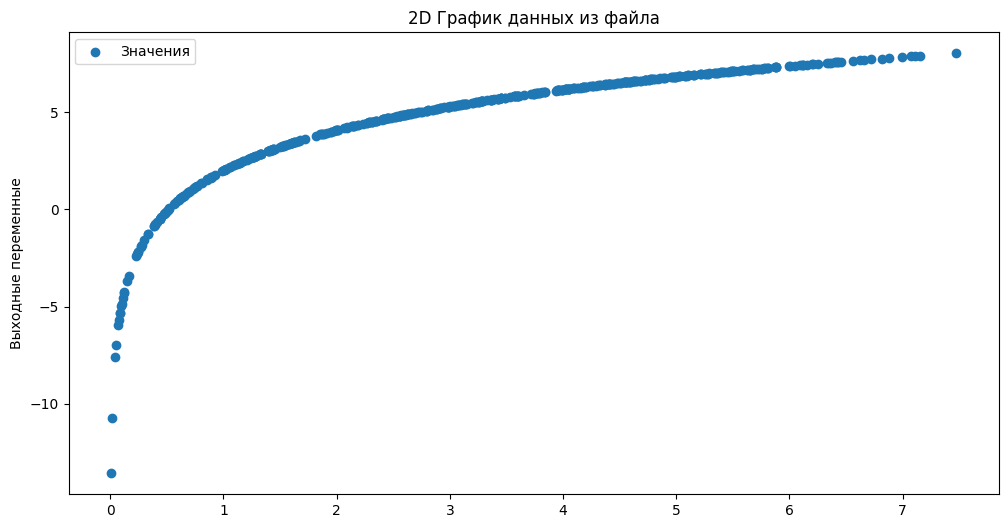

In [28]:
# Загрузка данных из файла 'datasetMy.txt'
ts = np.loadtxt("datasetMy.txt", usecols=[1, 2, 3])
# Разделение данных на входные (X) и выходные (Y) переменные
X = ts[:, 0:2]  # Входные переменные
Y = ts[:, 2]    # Выходные переменные

# Создание 2D графика
plt.figure(figsize=(12, 6))
# Визуализация данных на графике
plt.scatter(X[:, 0], Y, marker='o', linewidths=1, label='Значения')

plt.ylabel('Выходные переменные')
plt.title('2D График данных из файла')
plt.legend()
plt.show()


current error: 94.89010794151494
current error: 92.75470877358467
current error: 92.11959355471836
current error: 91.73097693299091
current error: 91.48159767106146
current error: 91.36837604564775
current error: 91.39909636680258
current error: 91.56608053695332
current error: 91.84784479627908
current error: 92.22670310256049
current error: 92.68603834894412
current error: 93.20881128634682
current error: 93.77673612611643
current error: 94.3699194725452
current error: 94.96688433499736
current error: 95.54492834893968
current error: 96.0807520471993
current error: 96.5512726796774
current error: 96.93453036570929
Consequent [-1] value: -2.381685
Consequent [-2] value: 0.0
Fitted value at index 9: 5.618789
Plotting errors


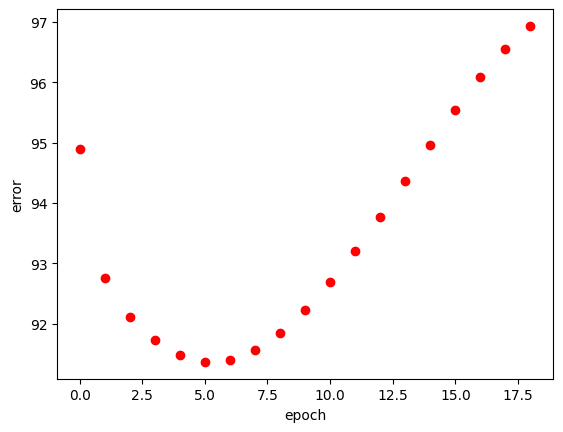

Plotting results


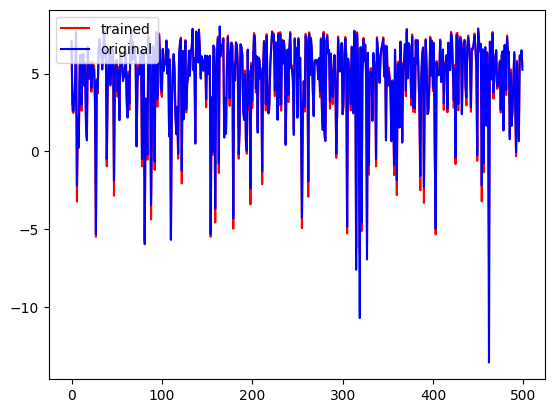

In [30]:
# Импорт необходимых модулей из библиотеки ANFIS
from anfis import membershipfunction

# Определение функций принадлежности для входных переменных
# В данном случае используются функции гауссовского типа
mf = [
    [['gaussmf', {'mean': 0., 'sigma': 1.}], ['gaussmf', {'mean': -1., 'sigma': 2.}], ['gaussmf', {'mean': -4., 'sigma': 10.}], ['gaussmf', {'mean': -7., 'sigma': 7.}]],
    [['gaussmf', {'mean': 1., 'sigma': 2.}], ['gaussmf', {'mean': 2., 'sigma': 3.}], ['gaussmf', {'mean': -2., 'sigma': 10.}], ['gaussmf', {'mean': -10.5, 'sigma': 5.}]]
]

# Создание объекта для хранения функций принадлежности
mfc = membershipfunction.MemFuncs(mf)
# Создание модели ANFIS с использованием определенных функций принадлежности
anf = anfis.ANFIS(X, Y, mfc)# Обучение модели с использованием гибридного алгоритма Jang Off-Line



anf.trainHybridJangOffLine(epochs=20)

# Вывод результатов
print("Consequent [-1] value:", round(anf.consequents[-1][0], 6))
print("Consequent [-2] value:", round(anf.consequents[-2][0], 6))
print("Fitted value at index 9:", round(anf.fittedValues[9][0], 6))

# Проверка результатов
if (
    round(anf.consequents[-1][0], 6) == -5.275538 and
    round(anf.consequents[-2][0], 6) == -1.990703 and
    round(anf.fittedValues[9][0], 6) == 0.002249
):
    print('Test is good')

# Визуализация ошибок обучения
print("Plotting errors")
anf.plotErrors()
# Визуализация результатов
print("Plotting results")
anf.plotResults()

In [33]:
# # Прогнозирование с использованием обученной модели ANFIS
predictTrain = anfis.predict(anf, X)

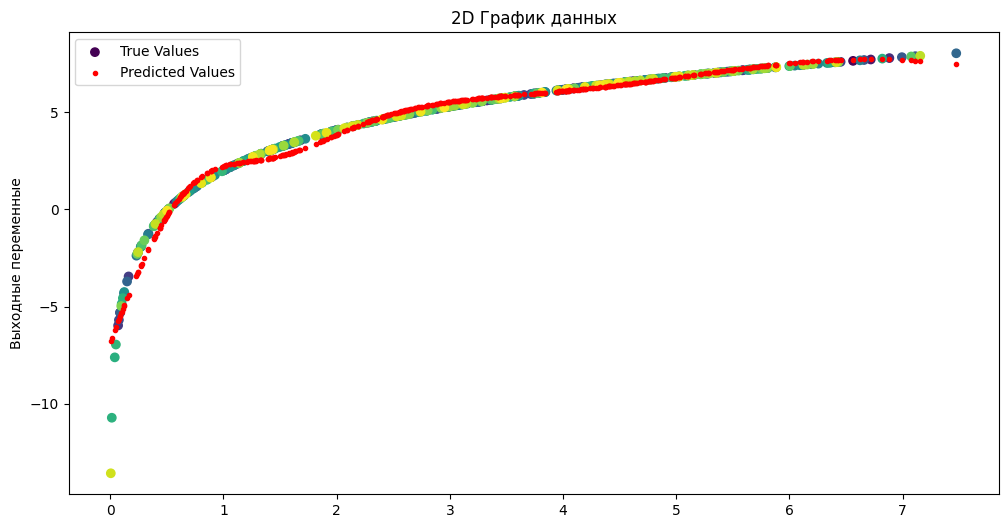

In [34]:
# Создание 2D графика
plt.figure(figsize=(12, 6))
# Генерация цветовых значений для точек на графике
col = np.arange(len(Y))
# Визуализация исходных данных
plt.scatter(X[:, 0], Y, marker='o', linewidths=1, c=col, label='True Values')

# Визуализация предсказанных данных
plt.scatter(X[:, 0], predictTrain, marker='.', linewidths=1, c='red', label='Predicted Values')

# Настройка графика
plt.ylabel('Выходные переменные')
plt.title('2D График данных')
plt.legend()

# Отображение графика
plt.show()


In [35]:
# Вычисление стандартного отклонения и вывод процента верно предсказанных точек
deviations = np.std(Y, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations, predictTrain, Y))


% верно полученных точек в тестовых данных
99.6


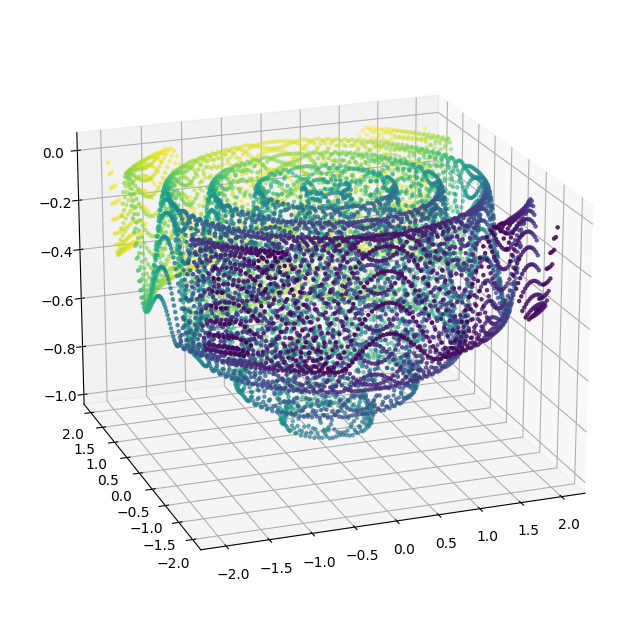

In [36]:
def wave_fun(x, y):
    return -(1 + np.cos(12 * np.sqrt(x**2 + y**2)))/(0.5*(x**2+y**2)+ 2)

# Генерация данных для функции Бирда
x1val, x2val = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
x1f2, x2f2 = np.meshgrid(x1val, x2val)
f2z = wave_fun(x1f2, x2f2)

# Преобразование данных в нужный формат
x11f2, x22f2, f2zz = x1f2.flatten(), x2f2.flatten(), f2z.flatten()
x11f2, x22f2, f2zz = x11f2.reshape((len(x11f2), 1)), x22f2.reshape((len(x22f2), 1)), f2zz.reshape((len(f2zz), 1))

# Запись данных в файл
if os.path.exists('datasetMy.txt'):
    os.remove('datasetMy.txt')

file = open('datasetMy.txt', 'w')
for i in range(len(x11f2)):
    file.write(f'"{i}" {x11f2[i][0]} {x22f2[i][0]} {f2zz[i][0]}\n')
file.close()

# Загрузка данных из файла
ts = np.loadtxt("datasetMy.txt", usecols=[1, 2, 3])
XAF2 = ts[:, 0:2]
YAF2 = ts[:, 2]

# Визуализация функции Бирда
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(YAF2))
ax.scatter(XAF2[:, 0], XAF2[:, 1], YAF2, marker='.', linewidths=1, c=col)
ax.view_init(20,-110)
plt.show()


In [37]:
from anfis import membershipfunction

In [40]:
# Конфигурация функций принадлежности для модели ANFIS
mf = [
    [['gaussmf', {'mean': -2., 'sigma': 1.}], ['gaussmf', {'mean': -1.75, 'sigma': 2.}], ['gaussmf', {'mean': -1.5, 'sigma': 1.}], ['gaussmf', {'mean': -1.25, 'sigma': 1.}],
     ['gaussmf', {'mean': -1, 'sigma': 1.}], ['gaussmf', {'mean': -0.75, 'sigma': 2.}], ['gaussmf', {'mean': -0.5, 'sigma': 1.}], ['gaussmf', {'mean': -0.25, 'sigma': 1.}]],
    [['gaussmf', {'mean': 0, 'sigma': 1.}], ['gaussmf', {'mean': 0.25, 'sigma': 1.}], ['gaussmf', {'mean': 0.5, 'sigma': 1.}], ['gaussmf', {'mean': 0.75, 'sigma': 1.}],
     ['gaussmf', {'mean': 1., 'sigma': 1.}], ['gaussmf', {'mean': 1.25, 'sigma': 1.}], ['gaussmf', {'mean': 1.5, 'sigma': 1.}], ['gaussmf', {'mean': 2, 'sigma': 1.}]]
]
# Создание функций принадлежности
mfc = membershipfunction.MemFuncs(mf)
# Создание и обучение модели ANFIS
anf = anfis.ANFIS(XAF2, YAF2, mfc)
anf.trainHybridJangOffLine(epochs=10)

# Вывод ключевых свойств обученной модели
print("Значение последствия [-1]:", round(anf.consequents[-1][0], 6))
print("Значение последствия [-2]:", round(anf.consequents[-2][0], 6))
print("Предсказанное значение [9]:", round(anf.fittedValues[9][0], 6))

# Проверка, соответствуют ли определенные условия
if (
    round(anf.consequents[-1][0], 6) == -5.275538 and
    round(anf.consequents[-2][0], 6) == -1.990703 and
    round(anf.fittedValues[9][0], 6) == 0.002249
):
    print('Тест успешен (условия выполняются)')

# Построение графиков ошибок и результатов
print("Построение графиков ошибок")
anf.plotErrors()
print("Построение графиков результатов")
anf.plotResults()


current error: 533.0938310445941


KeyboardInterrupt: 

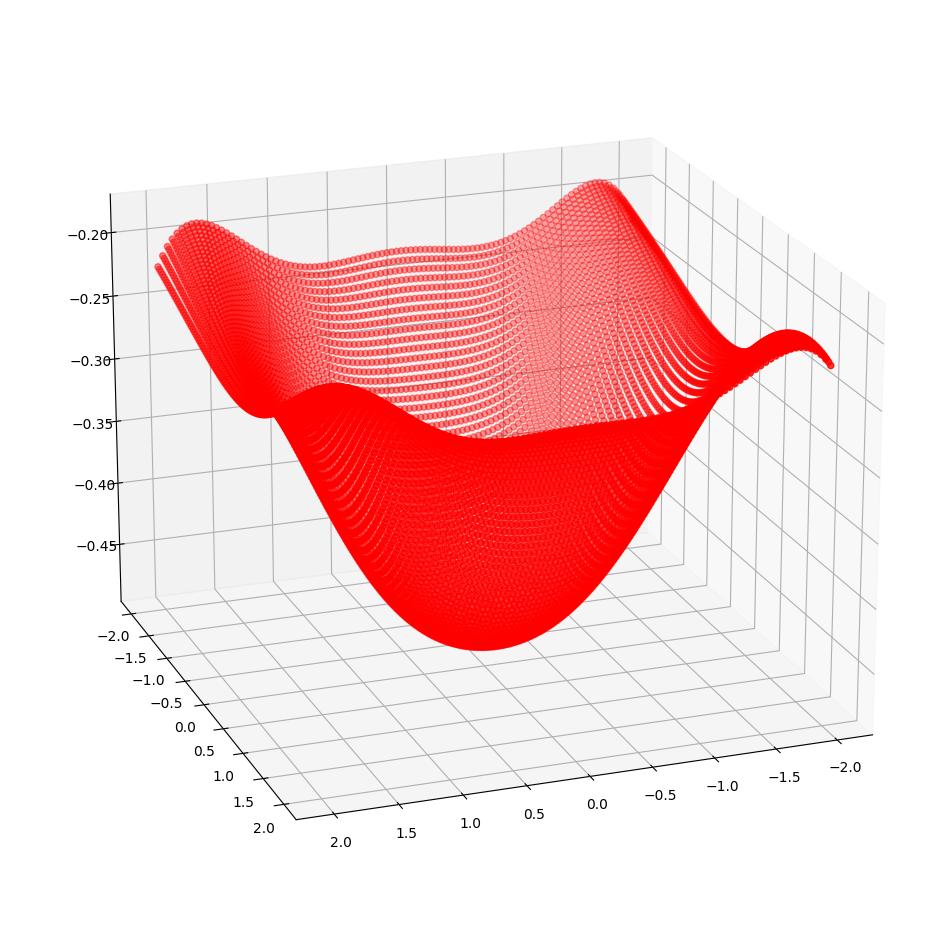

In [42]:
# Предсказание значений с использованием обученной модели ANFIS
predictTrain = anfis.predict(anf, XAF2)
# Построение трехмерного графика предсказанных значений
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(YAF2))
# Визуализация предсказанных значений на тренировочных данных
ax.scatter(XAF2[:, 0], XAF2[:, 1], predictTrain, marker='o', linewidths=1, c='RED')
# Настройка угла обзора для лучшего отображения графика
ax.view_init(20, 70)


In [43]:
# Вычисление стандартного отклонения тестовых данных
deviations = np.std(YAF2, ddof=1)

# Вывод процента верно предсказанных точек в тестовых данных
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations, predictTrain, YAF2))

% верно полученных точек в тестовых данных
64.79


In [46]:
def wave_fun(x, y):
    return -(1 + np.cos(12 * np.sqrt(x**2 + y**2)))/(0.5*(x**2+y**2)+ 2)
def function_12(x,a,b):
    return a + b * np.log(x)

#RBF

In [47]:

from google.colab import drive
drive.mount('/content/drive')

# Изменение рабочей директории на нужную папку в Google Drive
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

# Импорт необходимых библиотек
from scipy import *
from scipy.linalg import norm, pinv
from numpy.random import geometric
import pickle


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:

import plotly.express as px

In [49]:
class RBF:
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        # Здесь мы инициализируем центры, соответствующие скрытым нейронам RBF
        self.centers = np.random.uniform(-1, 1, (numCenters, indim))
        # Здесь два важных параметра, определяющих сеть RBF.
        # Первый параметр представляет собой β, второй - вес соединения
        self.betas = np.ones(numCenters) / 10
        self.W = np.random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return np.log(1 + np.linalg.norm(d - self.centers[c]) ** 2)

    def _calcAct(self, X):
        # рассчитываем активации RBF
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi, ci] = self._basisfunc(ci, x)
        return G

    def train(self, X, Y):
        """
        X: матрица размерности n x indim
        y: столбцовый вектор размерности n x 1
        """
        # используем k-средние для вычисления центров
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=self.numCenters)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # рассчитываем активации RBF
        G = self._calcAct(X)

        # рассчитываем веса выхода (псевдообратная матрица)
        self.W = np.dot(np.linalg.pinv(G), Y)

    def test(self, X):
        """
        X: матрица размерности n x indim
        """
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y


In [51]:
# Функция percentage вычисляет процент относительно общего числа.
def percentage(part, whole):
    return 100 * float(part) / float(whole)

# Функция predict прогнозирует выходное значение сети для заданной строки данных.
def predict(loaded_model, row):
    outputs = forward_propagate(loaded_model, row)
    return outputs

# Функция approximation_quality оценивает качество аппроксимации данных.
def approximation_quality(deviations, predictData, y_data):
    count = 0
    for i in range(len(predictData)):
        if (predictData[i] >= (y_data[i] - deviations) and predictData[i] <= (y_data[i] + deviations)):
            count = count + 1
    return percentage(count, len(predictData))

# Функция f2 представляет собой функцию для генерации данных.
def f2(x, y):
    return  (4 - 2.1 * x**2 + (x**4) / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2


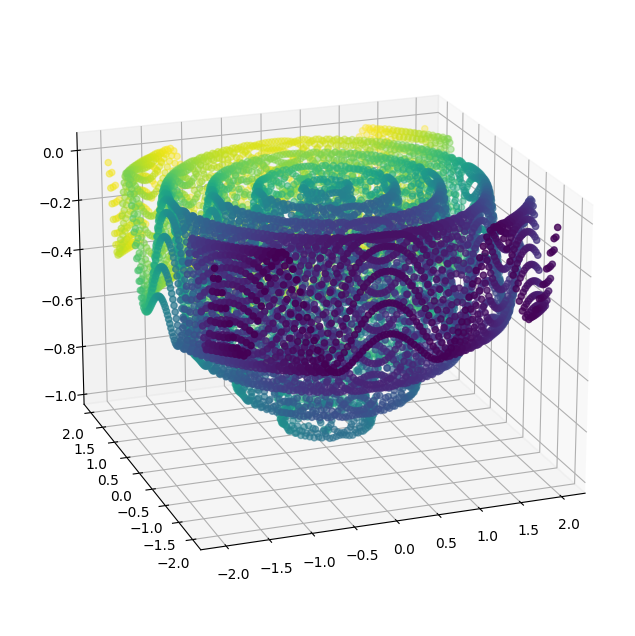

In [52]:
filename_model = 'modelBird.sav'

# Генерация данных для функции
x1val, x2val = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1val, x2val)
z = wave_fun(x1, x2)

# Преобразование данных в нужный формат
x11, x22, zz = x1.flatten(), x2.flatten(), z.flatten()
x11, x22, zz = x11.reshape((len(x11), 1)), x22.reshape((len(x22), 1)), zz.reshape((len(zz), 1))

# Создание датасета
dataset = np.concatenate((x11, x22), axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dataset, zz, test_size=0.4, random_state=123)

# Сохранение данных для последующего использования в обучении модели
np.savetxt('datasetBird.txt', np.concatenate((X_train, y_train), axis=1))

# Визуализация функции
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(zz))
ax.scatter(x1.flatten(), x2.flatten(), zz.flatten(), marker='o', linewidths=1, c=col)
ax.view_init(20, -110)
plt.show()


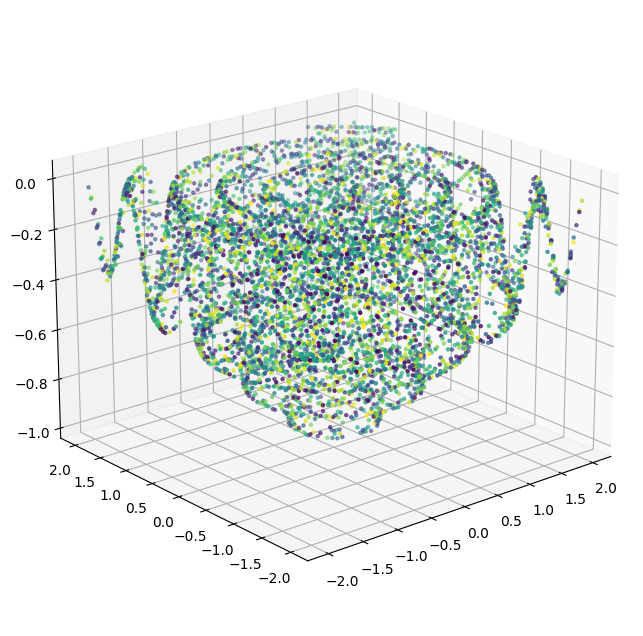

In [53]:
# Рисуем 3d график
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(y_train))
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker = '.', linewidths=1, c=col)
ax.view_init(20, -130)

In [54]:
col = np.arange(len(y_train))
fig = px.scatter_3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train.flatten(), color = col)

fig.show()

In [55]:
fig = go.Figure(data=[go.Surface(z=y_train.flatten())])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [56]:
len(y_train.flatten())

6000

In [57]:
X_train[:, 0]

array([ 1.87878788, -1.63636364, -1.15151515, ..., -1.27272727,
       -0.14141414,  1.31313131])

In [58]:
X_train[:, 1]

array([ 1.87878788, -1.7979798 , -1.75757576, ...,  0.1010101 ,
       -1.47474747, -0.58585859])

NameError: name 'rez_train' is not defined

In [62]:
# Создаем объект RBF сети с параметрами: входное пространство (2 признака), количество кластеров (150), выходное пространство (1).
rbf = RBF(2, 300, 1)

# Обучаем RBF сеть на тренировочных данных.
rbf.train(X_train, y_train)

# Применяем обученную RBF сеть к тренировочным и тестовым данным.
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)

# Сохраняем обученную RBF сеть в файл с использованием библиотеки pickle.
pickle.dump(rbf, open(filename_model, 'wb'))

# Рисуем 3d график

# fig = plt.figure(figsize=(16,8))
# ax = fig.add_subplot(111, projection='3d')
# col = np.arange(len(y_train))
# ax.scatter(X_train[:, 0], X_train[:, 1], rez_train, marker = 'o', linewidths=1, c='red')
# ax.view_init(20, -130)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [63]:
rez_train.flatten()

array([-3.38771192e-01, -5.92381351e-02, -4.55099976e-01, ...,
       -2.03469128e-04, -4.74294881e-01, -3.53037599e-01])

In [64]:
col = np.arange(len(y_train))
fig = px.scatter_3d(x=X_train[:, 0], y=X_train[:, 1], z=rez_train.flatten(), color = col)

fig.show()

In [65]:
# Вывод процента верно предсказанных точек в тестовых данных
loaded_model = pickle.load(open(filename_model, 'rb'))
deviations=np.std(y_test, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,rez_test,y_test))

% верно полученных точек в тестовых данных
100.0


In [66]:
# Генерация случайных чисел
def generation_sa(count):
  xa=[]
  i = 0
  while i < count:
    rand=np.random.normal(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    xa.extend(rand)
    i = i + 1
  z1 = f1(xa,2,3)
  x1=np.reshape(xa,(len(xa),1))
  z1=np.reshape(z1,(len(z1),1))
  return x1, z1

In [67]:
# Задаем имя файла для сохранения модели
filename_model = 'modelF1-СетьRBF-line.sav'

# Генерируем данные X, Y с использованием функции generation_sa
X, Y = generation_sa(500)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)


In [68]:
# Создаем объект RBF сети с параметрами: входное пространство (1 признак), количество кластеров (300), выходное пространство (1).
rbf = RBF(1, 300, 1)

# Обучаем RBF сеть на тренировочных данных.
rbf.train(X_train, y_train)

# Применяем обученную RBF сеть к тренировочным и тестовым данным.
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)

# Сохраняем обученную RBF сеть в файл с использованием библиотеки pickle.
pickle.dump(rbf, open(filename_model, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



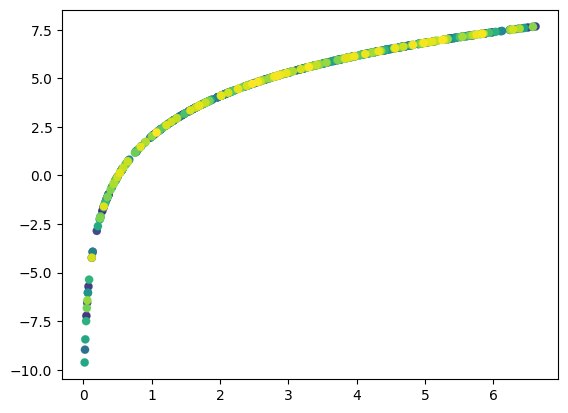

In [69]:
# Визуализация данных
plt.scatter(X, Y , marker = 'o', linewidths=0.1, c=np.arange(len(Y)))

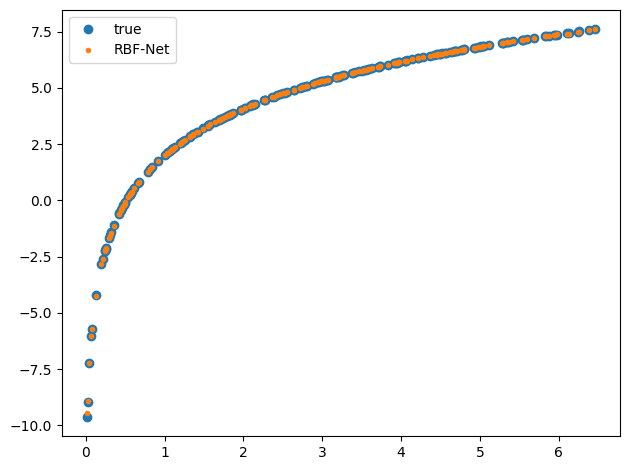

In [70]:
# Визуализация данных
rez_test = rbf.test(X_test)
plt.plot(np.sort(X_test, axis=0), np.sort(y_test, axis=0), 'o', label='true')
plt.plot(np.sort(X_test, axis=0) , np.sort(rez_test , axis=0), '.', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
# Загрузка обученной модели из файла
loaded_model = pickle.load(open(filename_model, 'rb'))

# Вычисление стандартного отклонения для тестовых данных
deviations = np.std(y_test, ddof=1)

# Вывод процента верно предсказанных точек в тестовых данных
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations, rez_test, y_test))


% верно полученных точек в тестовых данных
100.0
